In [4]:
import yfinance as yf
import csv
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Data collection

In [3]:
# GET LIST OF COMPANIES
# Get the symbol/ticker of the companies in the NASDAQ market from CSV previously downloaded from
# https://www.nasdaq.com/market-activity/stocks/screener
names = pd.read_csv('/home/jorgeluisgg/code/jorgeluisgg/project_awesome/raw_data/nasdaq_screener.csv')
print(names.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7004 entries, 0 to 7003
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      7003 non-null   object 
 1   Name        7004 non-null   object 
 2   Last Sale   7004 non-null   object 
 3   Net Change  7004 non-null   float64
 4   % Change    7004 non-null   object 
 5   Market Cap  6600 non-null   float64
 6   Country     6709 non-null   object 
 7   IPO Year    3948 non-null   float64
 8   Volume      7004 non-null   int64  
 9   Sector      6408 non-null   object 
 10  Industry    6407 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 602.0+ KB
None


In [4]:
# Create list with all tickers to iterate with the yfinance API
tickers_list = names[names.columns[0]].tolist()
tickers = [str(ticker) for ticker in tickers_list if "^" not in str(ticker)]
print(f'The number of companies available in the nasdaq list is: {len(tickers)}.')

The number of companies available in the nasdaq list is: 6622.


In [5]:
# Create list of yfinance objects
stocks = []
# Loop to fetch object for each ticker
for ticker in tickers:
    # Append the object to the list
    stocks.append(yf.Ticker(ticker))

print(f'The number of companies that were retrieved is: {len(stocks)}.')
# stocks[0:5],stocks[-5:]

The number of companies that were retrieved is: 6622.


In [6]:
# FLATTEN THE INFORMATION TO CREATE A DATAFRAME
# Create function to flatten information
def flatten_data(df,ticker):
    # Unstack the dataframe and reset the index
    df_ = df.unstack().reset_index()

    # Create the new column with row values containing the year and the feature names combined
    df_['Ticker'] = df_['level_0'].dt.year.astype(str) + ' ' + df_['level_1']

    # Drop unnecessary columns and transpose the column with names as the new head
    df_transposed = df_.drop(columns=['level_0', 'level_1']).set_index('Ticker').T

    # Add the Ticker column and set it as index
    df_transposed['Ticker'] = ticker
    df_transposed.set_index('Ticker', inplace=True)

    return df_transposed

In [59]:
data = []
for stock in stocks[0:10]:
    data.append(flatten_data(stock.balance_sheet,stock.ticker))

df= pd.concat(data,axis = 0, ignore_index = False)

In [19]:
companies = pd.read_csv('/home/jorgeluisgg/code/jorgeluisgg/project_awesome/process_data/raw_data_FINAL_ALL.csv')
companies.set_index('Ticker',inplace = True)
companies

,2023 Ordinary Shares Number,2023 Share Issued,2023 Net Debt,2023 Total Debt,2023 Tangible Book Value,2023 Invested Capital,2023 Working Capital,2023 Net Tangible Assets,2023 Common Stock Equity,2023 Total Capitalization,...,2024 Interest Received Cfo,2023 Dividends Paid Direct,2022 Dividends Paid Direct,2021 Dividends Paid Direct,2020 Dividends Paid Direct,2019 Dividends Paid Direct,2024 Net Income From Tax Loss Carryforward,2024 Current Deferred Taxes Liabilities,2024 Change In Interest Payable,2024 Excise Taxes
Ticker,,,,,,,,,,,,,,,,,,,,,
A,292123241.0,292123241.0,1.145000e+09,2.735000e+09,1.410000e+09,8.580000e+09,2.583000e+09,1.410000e+09,5.845000e+09,8.580000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA,178472464.0,178472464.0,8.670000e+08,1.915000e+09,4.068000e+09,6.062000e+09,1.375000e+09,4.068000e+09,4.251000e+09,5.983000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AACG,64000260.0,64585618.0,NaN,2.260687e+07,-1.421377e+08,1.130379e+08,-2.439576e+08,-1.421377e+08,1.130379e+08,1.130379e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AACI,8072849.0,8072849.0,2.504155e+06,2.564439e+06,1.683079e+07,1.939523e+07,-8.493234e+06,1.683079e+07,1.683079e+07,1.683079e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AACIW,8072849.0,8072849.0,2.504155e+06,2.564439e+06,1.683079e+07,1.939523e+07,-8.493234e+06,1.683079e+07,1.683079e+07,1.683079e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVIA,54220017.0,54220017.0,NaN,1.948000e+06,8.635500e+07,8.987800e+07,5.497000e+07,8.635500e+07,8.987800e+07,8.987800e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZVRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZVSA,405205.0,405211.0,NaN,8.656000e+03,-7.573306e+06,1.107460e+07,-6.841639e+06,-7.573305e+06,1.107460e+07,1.107460e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
companies = pd.read_csv('/home/jorgeluisgg/code/jorgeluisgg/project_awesome/process_data/raw_data_FINAL_ALL.csv')
companies.set_index('Ticker',inplace = True)


In [38]:
search_text = 'sp500'
# Getting all columns with the substring in their names
filtered_columns = companies.loc[:, companies.columns.str.contains(search_text)]
# filtered_columns = df.loc[:, columns_with_text]
stock = pd.DataFrame(filtered_columns.loc['A'].mean())
stock

,A
2023 Ratio ticker sp500,0.679379
2022 Ratio ticker sp500,1.056330
2021 Ratio ticker sp500,1.076913
2020 Ratio ticker sp500,1.286233
2019 Ratio ticker sp500,1.057144
2024 Ratio ticker sp500,NaN


In [39]:
stock.mean()

A    1.0312
dtype: float64

# Feature selection and engineering

# Fundamental analysis

Automation of the fundamental analysis by finding similarities between companies and targeting its performance on the stock market.

# Technical analysis

Trading strategy based on trend analysis on a timeseries treated as a stochastic process (no smoothing applied).

In [5]:
# Read the CSV file and set the 'Date' column as the index
dfprice = pd.read_csv('/home/jorgeluisgg/code/jorgeluisgg/project_awesome/raw_data/raw_data_stock_market_4y_fortimeseries.csv', index_col='Date')

# Convert the index to datetime with utc=True
dfprice.index = pd.to_datetime(dfprice.index, utc=True)


In [10]:
'''DEFINE VARIABLES'''
# # Filter the DataFrame based on the specified year
# year = 2023
# dfprice = dfprice[dfprice.index.year == year]

# Define the desired company
ticker = 'GOOG'

# Define the window size for the trend analysis
trend_window = 5

# Create a DataFrame 'dfcompany' with only the price column from 'dfprice'
dfcompany = pd.DataFrame(dfprice[ticker])

'''DELTAS'''
# Loop to create lagged versions of the 'AAPL' column
for i in range(1, trend_window):
    # Create a new column 't - i' which is the 'AAPL' column shifted by 'i' positions
    dfcompany[f't - {i}'] = dfcompany[ticker].shift(i)

# Drop rows with any NaN values (these will be the first 'trend_window - 1' rows)
dfcompany.dropna(inplace=True)

# Loop to calculate the differences (deltas) between the original ticker and its lagged versions
for i in range(1, trend_window):
    # Create a new column 'delta i' which is the difference between t and 't - i'
    dfcompany[f'delta {i}'] = dfcompany.iloc[:, i-1] - dfcompany.iloc[:, i]


'''TRENDS'''
# List of delta column names
delta_columns = [col for col in dfcompany.columns if col.startswith('delta')]

# Initialize a boolean series to True
upward_trend = pd.Series([True] * len(dfcompany), index=dfcompany.index)
downward_trend = pd.Series([True] * len(dfcompany), index=dfcompany.index)

# Compare each pair of consecutive columns
for i in range(len(delta_columns) - 1):
    upward_trend &= dfcompany[delta_columns[i]] > dfcompany[delta_columns[i + 1]]
    downward_trend &= dfcompany[delta_columns[i]] < dfcompany[delta_columns[i + 1]]

# Add the result to the DataFrame
dfcompany['upward_trend'] = upward_trend
dfcompany['downward_trend'] = downward_trend


'''TRADE SIGNAL'''
# Initialize the signal column
dfcompany['signal'] = 0
signal = 0

# Iterate through the rows to update the signal
for index, row in dfcompany.iterrows():
    if row['upward_trend']:
        signal = 1
    elif row['downward_trend'] and signal == 1:
        signal = 0
    dfcompany.at[index, 'signal'] = signal

# Identify buy and sell signals
dfcompany['buy_signal'] = (dfcompany['signal'] == 1) & (dfcompany['signal'].shift(1) == 0)
dfcompany['sell_signal'] = (dfcompany['signal'] == 0) & (dfcompany['signal'].shift(1) == 1)

# Record prices at buy and sell signals
dfcompany['buy_price'] = dfcompany[ticker].where(dfcompany['buy_signal'])
dfcompany['sell_price'] = dfcompany[ticker].where(dfcompany['sell_signal'])


'''GAINS'''
# Calculate gains from buy and sell signals
buy_prices = dfcompany['buy_price'].dropna().values
sell_prices = dfcompany['sell_price'].dropna().values

# Assuming we start by buying and then alternately selling and buying
gains = sell_prices - buy_prices[:len(sell_prices)]

# Calculate total gain from the trend strategy
total_gain_trend = gains.sum()

# Determine if there is an open position
open_position = len(buy_prices) > len(sell_prices)
if open_position:
    last_buy_price = buy_prices[-1]
    print(f"Open Position with Trend Strategy: Yes, Last Buy Price: ${last_buy_price}")
else:
    print("Open Position: No")


'''COMPARISON WITH SIMPLE BUY&HOLD STRATEGY'''
# Calculate gains from a simple buy-and-hold strategy
buy_price_simple = dfcompany[ticker].iloc[0]  # Buy at the start
sell_price_simple = dfcompany[ticker].iloc[-1]  # Sell at the end
total_gain_simple = sell_price_simple - buy_price_simple

print(f"Buy-and-Hold Strategy: Buy Price = ${buy_price_simple}, Sell Price = ${sell_price_simple}")

# Compare the two strategies
print(f"Gain Comparison: Trend Strategy = ${total_gain_trend}, Buy-and-Hold Strategy = ${total_gain_simple}")

# dfcompany

Open Position: No
Buy-and-Hold Strategy: Buy Price = $54.01900100708008, Sell Price = $173.9600067138672
Gain Comparison: Trend Strategy = $20.284992218017543, Buy-and-Hold Strategy = $119.94100570678711


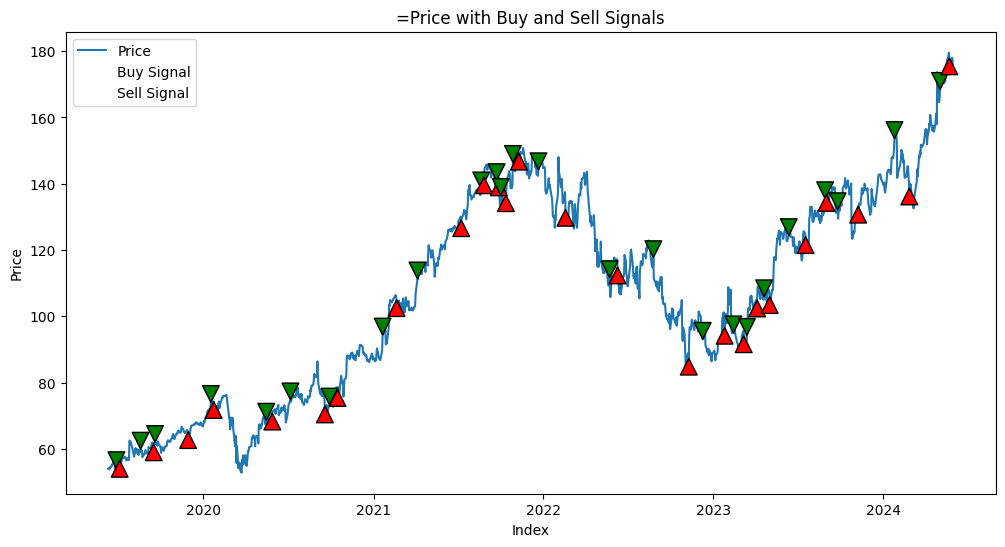

In [11]:
# Plot the stock price with buy and sell signals
plt.figure(figsize=(12, 6))
plt.plot(dfcompany[ticker], label='Price', marker='')
plt.scatter(dfcompany.index[dfcompany['buy_signal']], dfcompany[ticker][dfcompany['buy_signal']], marker='', color='g', label='Buy Signal', s=100)
plt.scatter(dfcompany.index[dfcompany['sell_signal']], dfcompany[ticker][dfcompany['sell_signal']], marker='', color='r', label='Sell Signal', s=100)

# Adding arrows for buy and sell signals
for idx, row in dfcompany.iterrows():
    if row['buy_signal']:
        plt.annotate('', xy=(idx, row[ticker]), xytext=(idx, row[ticker]+1),
                     arrowprops=dict(facecolor='green', shrink=0.05))
    elif row['sell_signal']:
        plt.annotate('', xy=(idx, row[ticker]), xytext=(idx, row[ticker]-1),
                     arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('=Price with Buy and Sell Signals')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [205]:
dfcompany.to_csv('/home/jorgeluisgg/code/jorgeluisgg/project_awesome/raw_data/trade_signal.csv')